In [6]:
# python libraries
import os
import sys
from pathlib import Path
from operator import methodcaller
from collections import OrderedDict
import dataclasses
from dataclasses import dataclass
from typing import (
    List,
    Tuple,
    Dict,
    Any,
    Mapping
)
from enum import Enum
# adding the path
if not str(Path(os.getcwd()).parent) in sys.path:
    sys.path.append(str(Path(os.getcwd()).parent))

# numpy
import numpy as np

# torch
import torch
import torchvision
from torch import nn
from torchvision import (
    transforms,
    datasets
    )
from torch.utils.data import DataLoader

try:
    from torchmetrics import Accuracy
except:
    print(f"[INFO] Installing the torchmetrics")
    %pip install torchmetrics
    from torchmetrics import Accuracy

# helper function
try:
    import my_helper as helper
except:
    print("[INFO] Downloading the helper function from github")
    import requests
    response = requests.get("https://raw.githubusercontent.com/Lashi0812/PyTorch2/master/my_helper.py")
    with open("my_helper.py" ,"wb") as f:
        f.write(response.content)
    import my_helper as helper

# Architecture

In [7]:
def init_cnn(module):
    if isinstance(module, nn.Linear | nn.Conv2d):
        nn.init.kaiming_normal_(module.weight)

In [8]:
class AlexNet(helper.Classifier):
    def __init__(self, lr=0.1, num_classes=10) -> None:
        super().__init__()
        self.lr = lr
        self.num_classes = num_classes
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Flatten(),
            nn.Linear(in_features=6400,out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=self.num_classes),
        )
        

In [9]:
AlexNet().layer_summary((1, 1, 224, 224))

Conv2d          output shape :(1, 96, 54, 54)
ReLU            output shape :(1, 96, 54, 54)
MaxPool2d       output shape :(1, 96, 26, 26)
Conv2d          output shape :(1, 256, 26, 26)
ReLU            output shape :(1, 256, 26, 26)
MaxPool2d       output shape :(1, 256, 12, 12)
Conv2d          output shape :(1, 384, 12, 12)
ReLU            output shape :(1, 384, 12, 12)
Conv2d          output shape :(1, 384, 12, 12)
ReLU            output shape :(1, 384, 12, 12)
Conv2d          output shape :(1, 256, 12, 12)
ReLU            output shape :(1, 256, 12, 12)
MaxPool2d       output shape :(1, 256, 5, 5)
Flatten         output shape :(1, 6400)
Linear          output shape :(1, 4096)
ReLU            output shape :(1, 4096)
Linear          output shape :(1, 4096)
ReLU            output shape :(1, 4096)
Linear          output shape :(1, 10)


# Training

Training the model in cuda


  0%|          | 0/10 [00:00<?, ?it/s]

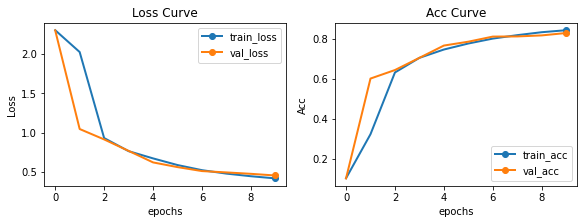

In [10]:
model = AlexNet(lr=0.01)
data = helper.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = helper.Trainer(max_epochs=10)
trainer.fit(model, data)